In [1]:
import numpy as np
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [2]:
df = pd.read_csv('bank_transactions.csv')
df

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5
...,...,...,...,...,...,...,...,...,...
1048562,T1048563,C8020229,8/4/90,M,NEW DELHI,7635.19,18/9/16,184824,799.0
1048563,T1048564,C6459278,20/2/92,M,NASHIK,27311.42,18/9/16,183734,460.0
1048564,T1048565,C6412354,18/5/89,M,HYDERABAD,221757.06,18/9/16,183313,770.0
1048565,T1048566,C6420483,30/8/78,M,VISAKHAPATNAM,10117.87,18/9/16,184706,1000.0


Checking on Null values in the dataframe

In [3]:
null_columns = df.columns[df.isnull().any()]
null_dob = df[df['CustomerDOB'].isnull()]
null_gender = df[df['CustGender'].isnull()]
null_location = df[df['CustLocation'].isnull()]
null_balance = df[df['CustAccountBalance'].isnull()]
print("columns with null values: ", null_columns)
print("Date of Birth null shape: ", null_dob.shape)
print("gender null shape: ", null_gender.shape)
print("location null shape: ", null_location.shape)
print("balance null shape: ", null_balance.shape)

columns with null values:  Index(['CustomerDOB', 'CustGender', 'CustLocation', 'CustAccountBalance'], dtype='object')
Date of Birth null shape:  (3397, 9)
gender null shape:  (1100, 9)
location null shape:  (151, 9)
balance null shape:  (2369, 9)


We decided to fill the null values using the mode and mean values such that CustGender we fill with the mode of the gender, CustLocation we fill with the mode of the location and the CustAccountBalance we fill with the mean of the account balance. We identified that under the CustomerDOB column, there are rare occurences where there are date of 1/1/1800 which seems not realistic. We decided to remove it from the dataframe. The TransactionTime is changed to str for easier slicing process

In [4]:
# Calculate the mode and mean before dropping rows
mode_gender = df['CustGender'].mode()[0]
mode_location = df['CustLocation'].mode()[0]
mean_balance = df['CustAccountBalance'].mean()

# Drop rows with missing 'CustomerDOB'
df = df.dropna(subset=['CustomerDOB'])

# Using .loc to fill missing values
df.loc[:, 'CustGender'].fillna(mode_gender, inplace=True)
df.loc[:, 'CustLocation'].fillna(mode_location, inplace=True)
df.loc[:, 'CustAccountBalance'].fillna(mean_balance, inplace=True)

# drop rows in the CustomerDOB with the value of 1/1/1800
df = df.drop(df[df['CustomerDOB'] == '1/1/1800'].index)

# Change the TransactionTime column data type to object / string
df['TransactionTime'] = df['TransactionTime'].astype(str)

C:\Users\irfan_j5mtdic\AppData\Local\Temp\ipykernel_27104\3346182121.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'CustGender'].fillna(mode_gender, inplace=True)
C:\Users\irfan_j5mtdic\AppData\Local\Temp\ipykernel_27104\3346182121.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'CustLocation'].fillna(mode_location, inplace=True)
C:\Users\irfan_j5mtdic\AppData\Local\Temp\ipykernel_27104\3346182121.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/

We identified that the CustomerDOB, TransactionDate, and TransactionTime column have a wrong format for the date and time. So we decided to change the format for each columns. For TransactionDate and TransactionTime we decide to combine it into columnd TransactionDateTime

In [5]:
def convert_and_format_dates_and_times(df):

    # formatting CustomerDOB columns do datetime
    if not pd.api.types.is_datetime64_any_dtype(df['CustomerDOB']):
        df['CustomerDOB'] = pd.to_datetime(df['CustomerDOB'].str[:-2] + '19' + df['CustomerDOB'].str[-2:], format='%d/%m/%Y', errors='coerce')
    
    # Create TransactionDateTime columns combining both TransactionDate and TransactionTime
    df['TransactionDateTime'] = pd.to_datetime(df['TransactionDate'].str[:-2] + '20' + df['TransactionDate'].str[-2:] + " " + df['TransactionTime'].str.zfill(6), format='%d/%m/%Y %H%M%S', errors='coerce')
    
    return df

df = convert_and_format_dates_and_times(df)

we copy the original dataframe into the new variable

In [6]:
df_cleaned = df.copy()
df_cleaned

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),TransactionDateTime
0,T1,C5841053,1994-01-10,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0,2016-08-02 14:32:07
1,T2,C2142763,1957-04-04,M,JHAJJAR,2270.69,2/8/16,141858,27999.0,2016-08-02 14:18:58
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2/8/16,142712,459.0,2016-08-02 14:27:12
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2/8/16,142714,2060.0,2016-08-02 14:27:14
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5,2016-08-02 18:11:56
...,...,...,...,...,...,...,...,...,...,...
1048562,T1048563,C8020229,1990-04-08,M,NEW DELHI,7635.19,18/9/16,184824,799.0,2016-09-18 18:48:24
1048563,T1048564,C6459278,1992-02-20,M,NASHIK,27311.42,18/9/16,183734,460.0,2016-09-18 18:37:34
1048564,T1048565,C6412354,1989-05-18,M,HYDERABAD,221757.06,18/9/16,183313,770.0,2016-09-18 18:33:13
1048565,T1048566,C6420483,1978-08-30,M,VISAKHAPATNAM,10117.87,18/9/16,184706,1000.0,2016-09-18 18:47:06


function to calculate age for each customer based on the CustomerDOB and TransactionDateTime

In [7]:
def calculate_age(birthdate, transaction_date_time):
    # Calculate age
    age = transaction_date_time.year - birthdate.year
    # Check if the birthday has occurred this year
    if transaction_date_time.month < birthdate.month or (transaction_date_time.month == birthdate.month and transaction_date_time.day < birthdate.day):
        age -= 1
    return age

In [8]:
df_cleaned['age'] = df_cleaned.apply(lambda row: calculate_age(row['CustomerDOB'], row['TransactionDateTime']), axis=1)
df_cleaned

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),TransactionDateTime,age
0,T1,C5841053,1994-01-10,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0,2016-08-02 14:32:07,22
1,T2,C2142763,1957-04-04,M,JHAJJAR,2270.69,2/8/16,141858,27999.0,2016-08-02 14:18:58,59
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2/8/16,142712,459.0,2016-08-02 14:27:12,19
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2/8/16,142714,2060.0,2016-08-02 14:27:14,42
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5,2016-08-02 18:11:56,28
...,...,...,...,...,...,...,...,...,...,...,...
1048562,T1048563,C8020229,1990-04-08,M,NEW DELHI,7635.19,18/9/16,184824,799.0,2016-09-18 18:48:24,26
1048563,T1048564,C6459278,1992-02-20,M,NASHIK,27311.42,18/9/16,183734,460.0,2016-09-18 18:37:34,24
1048564,T1048565,C6412354,1989-05-18,M,HYDERABAD,221757.06,18/9/16,183313,770.0,2016-09-18 18:33:13,27
1048565,T1048566,C6420483,1978-08-30,M,VISAKHAPATNAM,10117.87,18/9/16,184706,1000.0,2016-09-18 18:47:06,38


We want to have 6 bin to classify each customer into 6 group of ages

In [9]:
bins_age = [16, 20, 30, 40, 50, 60, 70]
group_names = ['Teenagers', '20s', '30s', '40s', '50s', '60+']
df_cleaned['age_group'] = pd.cut(df_cleaned['age'], bins_age, labels=group_names, include_lowest=True)

Question 1: What is the distribution of number of transaction among the different age group? (descriptive question)
Bar chart that show the distribution of the frequency of transaction based on the age group

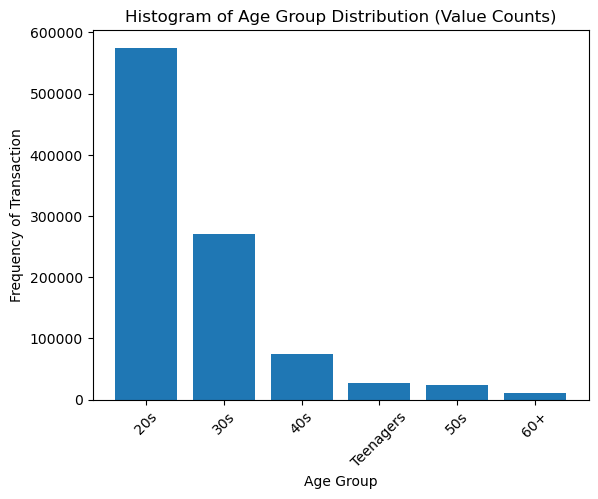

In [10]:
ageGroup_valueCount = df_cleaned["age_group"].value_counts()
age_groups = ageGroup_valueCount.index.to_numpy()  # Get category labels (age groups)
frequencies = ageGroup_valueCount.to_numpy()  # Get frequencies (number of people in each group)

# Create the histogram
plt.bar(age_groups, frequencies)  # Plot bars for each age group with corresponding frequency

plt.xlabel("Age Group")
plt.ylabel("Frequency of Transaction")
plt.title("Histogram of Age Group Distribution (Value Counts)")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if many categories

# Display the histogram
plt.show()

In [19]:
#checking how many unique value in CustomerID column
df_cleaned['CustomerID'].nunique()

840889

Question : Fraud Detection

In [11]:
# Assuming df_cleaned is your cleaned DataFrame
df_copy = df_cleaned.copy()

# Display the first few rows of the copied dataset
print(df_copy.head())

  TransactionID CustomerID CustomerDOB CustGender CustLocation  \
0            T1   C5841053  1994-01-10          F   JAMSHEDPUR   
1            T2   C2142763  1957-04-04          M      JHAJJAR   
2            T3   C4417068  1996-11-26          F       MUMBAI   
3            T4   C5342380  1973-09-14          F       MUMBAI   
4            T5   C9031234  1988-03-24          F  NAVI MUMBAI   

   CustAccountBalance TransactionDate TransactionTime  \
0            17819.05          2/8/16          143207   
1             2270.69          2/8/16          141858   
2            17874.44          2/8/16          142712   
3           866503.21          2/8/16          142714   
4             6714.43          2/8/16          181156   

   TransactionAmount (INR) TransactionDateTime  age  age_group  
0                     25.0 2016-08-02 14:32:07   22        20s  
1                  27999.0 2016-08-02 14:18:58   59        50s  
2                    459.0 2016-08-02 14:27:12   19  Teenagers  


In [12]:
# Convert TransactionDate to datetime
df_copy['TransactionDate'] = pd.to_datetime(df_copy['TransactionDate'], format='%Y-%m-%d', errors='coerce')

# Convert TransactionTime to datetime.time (assuming it's in HH:MM:SS format)
df_copy['TransactionTime'] = pd.to_datetime(df_copy['TransactionTime'], format='%H:%M:%S', errors='coerce').dt.time

# Handle NaT values in TransactionTime by filling them with a default time, e.g., '00:00:00'
df_copy['TransactionTime'] = df_copy['TransactionTime'].apply(lambda x: x if pd.notnull(x) else pd.to_datetime('00:00:00', format='%H:%M:%S').time())

# Combine TransactionDate and TransactionTime into a single datetime column for easier processing
df_copy['TransactionDateTime'] = df_copy.apply(lambda row: pd.Timestamp.combine(row['TransactionDate'], row['TransactionTime']), axis=1)

print(df_copy.head())


  TransactionID CustomerID CustomerDOB CustGender CustLocation  \
0            T1   C5841053  1994-01-10          F   JAMSHEDPUR   
1            T2   C2142763  1957-04-04          M      JHAJJAR   
2            T3   C4417068  1996-11-26          F       MUMBAI   
3            T4   C5342380  1973-09-14          F       MUMBAI   
4            T5   C9031234  1988-03-24          F  NAVI MUMBAI   

   CustAccountBalance TransactionDate TransactionTime  \
0            17819.05             NaT        00:00:00   
1             2270.69             NaT        00:00:00   
2            17874.44             NaT        00:00:00   
3           866503.21             NaT        00:00:00   
4             6714.43             NaT        00:00:00   

   TransactionAmount (INR)  TransactionDateTime  age  age_group  
0                     25.0  0001-01-01 00:00:00   22        20s  
1                  27999.0  0001-01-01 00:00:00   59        50s  
2                    459.0  0001-01-01 00:00:00   19  Teenager

In [13]:
df_copy

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),TransactionDateTime,age,age_group
0,T1,C5841053,1994-01-10,F,JAMSHEDPUR,17819.05,NaT,00:00:00,25.0,0001-01-01 00:00:00,22,20s
1,T2,C2142763,1957-04-04,M,JHAJJAR,2270.69,NaT,00:00:00,27999.0,0001-01-01 00:00:00,59,50s
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,NaT,00:00:00,459.0,0001-01-01 00:00:00,19,Teenagers
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,NaT,00:00:00,2060.0,0001-01-01 00:00:00,42,40s
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,NaT,00:00:00,1762.5,0001-01-01 00:00:00,28,20s
...,...,...,...,...,...,...,...,...,...,...,...,...
1048562,T1048563,C8020229,1990-04-08,M,NEW DELHI,7635.19,NaT,00:00:00,799.0,0001-01-01 00:00:00,26,20s
1048563,T1048564,C6459278,1992-02-20,M,NASHIK,27311.42,NaT,00:00:00,460.0,0001-01-01 00:00:00,24,20s
1048564,T1048565,C6412354,1989-05-18,M,HYDERABAD,221757.06,NaT,00:00:00,770.0,0001-01-01 00:00:00,27,20s
1048565,T1048566,C6420483,1978-08-30,M,VISAKHAPATNAM,10117.87,NaT,00:00:00,1000.0,0001-01-01 00:00:00,38,30s


In [23]:
# Feature Engineering
df_copy['TransactionHour'] = df_copy['TransactionDateTime'].dt.hour
df_copy['TransactionDayOfWeek'] = df_copy['TransactionDateTime'].dt.dayofweek
df_copy['TransactionDayOfMonth'] = df_copy['TransactionDateTime'].dt.day
df_copy['AccountBalanceChange'] = df_copy['CustAccountBalance'].diff().fillna(0)
df_copy['IsNightTransaction'] = df_copy['TransactionHour'].apply(lambda x: 1 if x >= 0 and x <= 6 else 0)

# Encoding categorical variables
df_copy['CustGender'] = df_copy['CustGender'].map({'F': 0, 'M': 1})

# Drop columns that are not needed for modeling
df_copy = df_copy.drop(columns=['TransactionID', 'CustomerID', 'TransactionDate', 'TransactionTime', 'CustomerDOB', 'CustLocation', 'TransactionDateTime'])

df

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,1994-01-10,F,JAMSHEDPUR,17819.05,2016-08-02,14:32:07,25.0
1,T2,C2142763,1957-04-04,M,JHAJJAR,2270.69,2016-08-02,14:18:58,27999.0
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-08-02,14:27:12,459.0
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-08-02,14:27:14,2060.0
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-08-02,18:11:56,1762.5
...,...,...,...,...,...,...,...,...,...
1048562,T1048563,C8020229,1990-04-08,M,NEW DELHI,7635.19,2016-09-18,18:48:24,799.0
1048563,T1048564,C6459278,1992-02-20,M,NASHIK,27311.42,2016-09-18,18:37:34,460.0
1048564,T1048565,C6412354,1989-05-18,M,HYDERABAD,221757.06,2016-09-18,18:33:13,770.0
1048565,T1048566,C6420483,1978-08-30,M,VISAKHAPATNAM,10117.87,2016-09-18,18:47:06,1000.0


In [24]:
from sklearn.ensemble import IsolationForest

# Define features
X = df_copy.drop(columns=['CustAccountBalance', 'TransactionAmount (INR)'])

# Initialize the Isolation Forest model
model = IsolationForest(n_estimators=100, contamination=0.01, random_state=42)

# Fit the model
model.fit(X)

# Predict anomalies
df_copy['anomaly'] = model.predict(X)

# Convert -1 to 1 for anomaly and 1 to 0 for normal
df_copy['anomaly'] = df_copy['anomaly'].map({1: 0, -1: 1})

# Display the anomalies
anomalies = df_copy[df_copy['anomaly'] == 1]
print(anomalies)


         CustGender  CustAccountBalance  TransactionAmount (INR)  \
66                0           224685.48                   339.92   
128               0              923.01                    25.00   
3253              0             1853.32                 11300.00   
3435              1          1005616.13                    50.00   
4088              1            62907.82                   300.00   
...             ...                 ...                      ...   
1047249           0            54556.35                  3337.00   
1047254           0             7648.07                   542.00   
1047258           0            35417.85                  2030.00   
1047266           0           275316.16                  1735.00   
1048466           1          1644114.86                   120.00   

         TransactionHour  TransactionDayOfWeek  TransactionDayOfMonth  \
66                     1                     3                      4   
128                    6             

In [25]:
# Summary of anomalies
print(df_copy['anomaly'].value_counts())

# Analyze anomalies
print(anomalies.describe())

anomalies


anomaly
0    977952
1      9879
Name: count, dtype: int64
        CustGender  CustAccountBalance  TransactionAmount (INR)  \
count  9879.000000        9.879000e+03              9879.000000   
mean      0.285353        3.154500e+05              1301.273022   
std       0.451605        1.418891e+06              4841.101615   
min       0.000000        0.000000e+00                 0.000000   
25%       0.000000        6.626155e+03                70.000000   
50%       0.000000        2.501934e+04               255.000000   
75%       1.000000        1.213463e+05              1000.000000   
max       1.000000        5.099967e+07            183042.000000   

       TransactionHour  TransactionDayOfWeek  TransactionDayOfMonth  \
count      9879.000000           9879.000000            9879.000000   
mean          1.984006              3.006580              14.579208   
std           2.382477              2.357641              10.284866   
min           0.000000              0.000000          

,CustGender,CustAccountBalance,TransactionAmount (INR),TransactionHour,TransactionDayOfWeek,TransactionDayOfMonth,AccountBalanceChange,IsNightTransaction,anomaly
66,0,224685.48,339.92,1,3,4,198298.31,1,1
128,0,923.01,25.00,6,0,8,910.47,1,1
3253,0,1853.32,11300.00,5,4,21,-213732.06,1,1
3435,1,1005616.13,50.00,5,4,21,950393.37,1,1
4088,1,62907.82,300.00,4,3,22,-10514032.11,1,1
...,...,...,...,...,...,...,...,...,...
1047249,0,54556.35,3337.00,1,6,18,32281.95,1,1
1047254,0,7648.07,542.00,1,6,18,-70655.87,1,1
1047258,0,35417.85,2030.00,1,6,18,28582.70,1,1
1047266,0,275316.16,1735.00,0,6,18,273519.15,1,1
